## Unsupervised Learning
* Nowadays, it is a common assertion that huge amounts of data are available from
the Internet for learning. 
* **Clustering** - Grouping elements, things that belongs to the same category in the same group.  Clustering involves finding groups
where all elements in the group are similar, but objects in different groups are not. 

### Clustering methods
* k-means
* affinity propagation
* mean shift
* Gaussian Mixture Models.

> Another example of unsupervised learning is **Dimensionality Reduction**. Suppose
we represent learning instances with a large number of attributes and want to
visualize them to identify their principal patterns. This is very difficult when the
number of features is more than three, simply because we cannot visualize more than
three dimensions. **Dimensionality Reduction** methods present a way to represent
data points of a high dimensional dataset in a lower dimensional space, keeping (at
least partly) their pattern structure.

### Principal Component Analysis
* **Principal Component Analysis (PCA)** is an orthogonal linear transformation that
turns a set of possibly correlated variables into a new set of variables that are as
uncorrelated as possible. 

### 1. KMeans

```
sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
```

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

#### simple example

In [1]:
from sklearn.cluster import KMeans
import numpy as np

In [2]:
X = np.array([
    [1, 2], [1, 4], [1, 0],
    [10, 2], [10, 4], [10, 0]
])

In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [9]:
kmeans.labels_

array([1, 2, 1, 0, 0, 0])

In [10]:
kmeans.predict([[0, 0], [12, 3], [14, 0]])

array([1, 0, 0])

In [11]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  1.],
       [ 1.,  4.]])

In [12]:
kmeans.score(X)

-10.0

## Introduction
> K-means clustering is one of the most widely used unsupervised machine learning algorithms that forms clusters of data based on the similarity between data instances. For this particular algorithm to work, the number of clusters has to be defined beforehand. The K in the K-means refers to the number of clusters.

### How does K-Means works
* The K-means algorithm starts by randomly choosing a centroid value for each cluster. After that the algorithm iteratively performs three steps: 
1. Find the Euclidean distance between each data instance and centroids of all the clusters; 
2. Assign the data instances to the cluster of the centroid with nearest distance.
3. Calculate new centroid values based on the mean values of the coordinates of all the data instances from the corresponding cluster.

### Example:

### 1. Create Data

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [14]:
X = np.array([
      [5,3],
     [10,15],
     [15,12],
     [24,10],
     [30,45],
     [85,70],
     [71,80],
     [60,78],
     [55,52],
     [80,91]
])
X.shape

(10, 2)

### Visualise the data
> Let's visualise each point here on a scatter plot


In [17]:
x, y = X[:,0], X[:, -1]
x, y

(array([ 5, 10, 15, 24, 30, 85, 71, 60, 55, 80]),
 array([ 3, 15, 12, 10, 45, 70, 80, 78, 52, 91]))

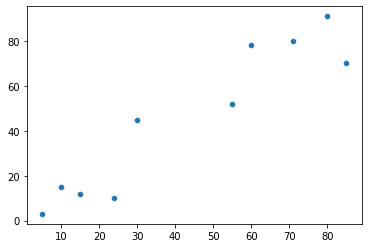

In [21]:
sns.scatterplot(x=x, y=y)
plt.show()

> From the visualisation now we can be able to see that we have two clusters and each cluster contains 5 points.

#### Create a Cluster

In [22]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [23]:
kmeans.labels_

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

> Now let's see what centroid values the algorithm generated for the final clusters.

In [24]:
kmeans.cluster_centers_

array([[70.2, 74.2],
       [16.8, 17. ]])

> Since we have 2 clusters then, which means the first row represents the coodinates of the first centroid and the last two  represent the coodinates of the last centroid. 

In [26]:
centroid_A, centroid_B = kmeans.cluster_centers_
centroid_A, centroid_B 

(array([70.2, 74.2]), array([16.8, 17. ]))

> **Visualisation**

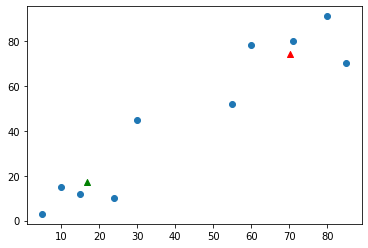

In [34]:
plt.scatter(x=x, y=y)
plt.scatter(x=centroid_A[0], y =centroid_A[1], c="red", marker="^")
plt.scatter(x=centroid_B[0], y =centroid_B[1], c="green", marker="^")

plt.show()

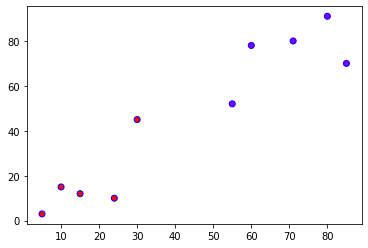

In [39]:
plt.scatter(x,y, c=kmeans.labels_, cmap='rainbow', edgecolor="blue")
plt.show()

> That's it about clustering.

### Hand Written Digits SKlearn dataset

In [40]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.target, digits.target_names, digits.data

(array([0, 1, 2, ..., 8, 9, 8]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]))

> So we can see that we have digits from `0-9`

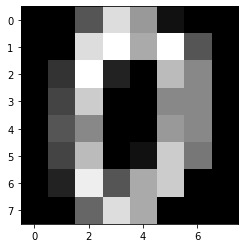

(None, (1797, 64))

In [43]:
plt.imshow(digits.data[0].reshape(8, -1), cmap="gray")
plt.show(), digits.data.shape

> Data

In [44]:
X = digits.data
y= digits.target

### PCA
* Principal component analysis (PCA).
> Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

```
class sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
```

**n_components** - Number of components to keep. if n_components is not set all components are kept

> [Docs](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [48]:
from sklearn.decomposition import PCA
estimator = PCA(n_components=10) ## We have 10 digits from 0 - 9
X_pca = estimator.fit_transform(X)

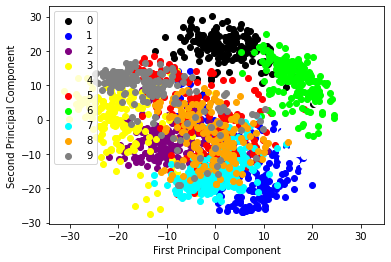

In [53]:
def plot_pca_scatter():
    
    colors = ['black', 'blue', 'purple', 'yellow', 'white',
 'red', 'lime', 'cyan', 'orange', 'gray']
    for i in range(len(colors)):
        px = X_pca[:, 0][y == i]
        py = X_pca[:, 1][y == i]
        plt.scatter(px, py, c=colors[i])
    plt.legend(digits.target_names)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    
plot_pca_scatter()

**Ref: Raúl Garreta, Guillermo Moncecchi - Learning scikit-learn_ Machine Learning in Python (2013, Packt) - libgen.lc Page 67**

### Clustering handwritten digits with `k-means`

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
images = digits.images

In [87]:
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(X, y, images, test_size=.3, random_state=33)

In [88]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, images_train.shape

((1257, 64), (540, 64), (1257,), (540,), (1257, 8, 8))

In [89]:
n_digits = len(digits.target_names)
n_digits # Number of clusters

10

In [90]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= n_digits, random_state=33)
kmeans

KMeans(n_clusters=10, random_state=33)

In [91]:
kmeans.fit(X_train)

KMeans(n_clusters=10, random_state=33)

(4, <matplotlib.image.AxesImage at 0x27bc93b70d0>)

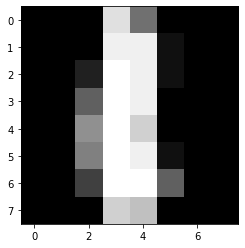

In [94]:
kmeans.labels_[0], plt.imshow(images_train[0], cmap="gray")

> We are getting `4` and `1`.

> **Note:** that the cluster number has nothing to do with the real number value.
Remember that we have not used the class to classify; we only grouped images by
similarity. Let's see how our algorithm behaves on the testing data.


### Alternative clustering methods
The scikit-learn toolkit includes several clustering algorithms, all of them including
similar methods and parameters to those we used in k-means. In this section we will
briefly review some of them, suggesting some of their advantages.

> [Docs](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster)